In [15]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from tsn_analyzer import tsn_analyzer
from network_gen import *

In [16]:
# Define common parameter
burst = 1           # [kb]
latency = 0.001     # [s]
ser_rate = 10000    # [kb/s]
pkt_leng = 0        # [kb]
eta = 1
capacity = eta*ser_rate # [kb/s]
dummy = 1

# initialize analyzer
analyzer = tsn_analyzer()

Fig. 16(a) Reproduce
------------------
Delay vs. # of servers for interleaved tandem

In [17]:
num_servers = np.arange(1, 26)
utility = 0.5

# container of answer
tfa_total_delays = [0]*len(num_servers)
tfa_pp_total_delays = [0]*len(num_servers)

In [18]:
# simulate all possible server numbers
for i, ser_num in enumerate(tqdm(num_servers)):
    # Generate network
    network = generate_interleaved_tandem(size=ser_num,
                                          burst=burst,
                                          arr_rate=dummy,
                                          pkt_leng=pkt_leng,
                                          latency=latency,
                                          ser_rate=ser_rate,
                                          capacity=capacity)
    
    analyzer.parse(network) # parse the network object
    analyzer.set_utility(utility)

    # solve TFA problem
    tfa_delay = analyzer.solve_tfa(f"{ser_num}-server interleave TFA")
    tfa_total_delays[i] = sum(tfa_delay)

    # solve TFA++ problem
    tfa_pp_delay = analyzer.solve_tfa_pp(f"{ser_num}-server interleave TFA++")
    tfa_pp_total_delays[i] = sum(tfa_pp_delay)


100%|██████████| 25/25 [00:01<00:00, 12.71it/s]


In [19]:
tfa_pp_total_delays

[0.0011,
 0.0021999999999999997,
 0.00345,
 0.00475417,
 0.00611493,
 0.007534750000000001,
 0.00901619,
 0.010561920000000002,
 0.012174740000000003,
 0.013857560000000001,
 0.015613410000000001,
 0.017445460000000003,
 0.019357020000000003,
 0.021351540000000002,
 0.023432630000000003,
 0.02560404,
 0.02786968,
 0.03023365,
 0.03270022,
 0.03527384,
 0.037959150000000004,
 0.040761000000000006,
 0.04368445000000001,
 0.046734780000000004,
 0.04991749]

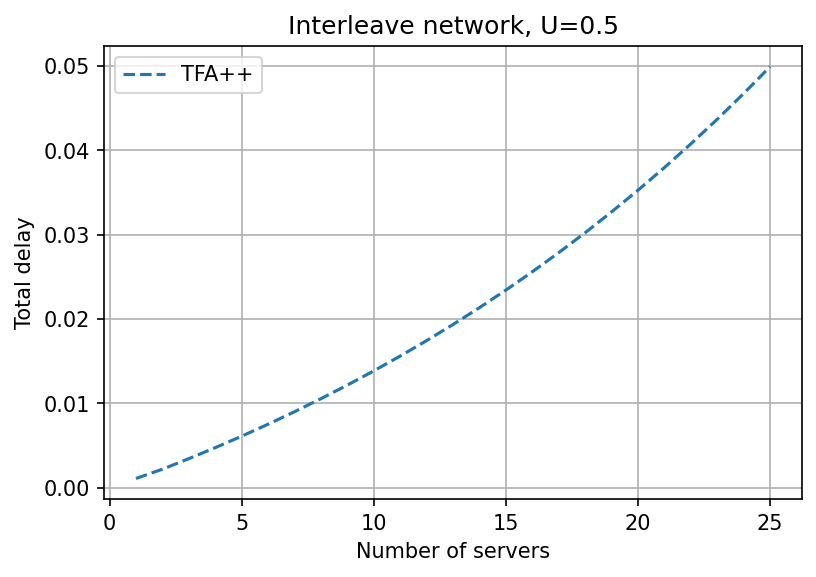

In [20]:
# Plot using matplot
plt.figure(dpi=150)
# plt.plot(num_servers, tfa_total_delays, '-', label="TFA")
plt.plot(num_servers, tfa_pp_total_delays, '--', label="TFA++")
plt.title("Interleave network, U=0.5")
plt.xlabel("Number of servers")
plt.ylabel("Total delay")
plt.legend()
plt.grid()
plt.show()

Fig. 17(a) Reproduce
------------------
Delay vs. network load for interleaved tandem

In [33]:
num_servers = 20
utility = np.arange(0.05, 1.2, 0.05)

# container of answer
tfa_total_delays = [0]*len(utility)
tfa_pp_total_delays = [0]*len(utility)

In [34]:
# simulate all possible server numbers
for i, util in enumerate(tqdm(utility)):
    # Generate network
    network = generate_interleaved_tandem(size=num_servers,
                                          burst=burst,
                                          arr_rate=dummy,
                                          pkt_leng=pkt_leng,
                                          latency=latency,
                                          ser_rate=ser_rate,
                                          capacity=capacity)
    
    analyzer.parse(network) # parse the network object
    analyzer.set_utility(util)

    # solve TFA problem
    tfa_delay = analyzer.solve_tfa(f"{util}-loaded interleave TFA")
    tfa_total_delays[i] = sum(tfa_delay)

    # solve TFA++ problem
    tfa_pp_delay = analyzer.solve_tfa_pp(f"{util}-loaded interleave TFA++")
    tfa_pp_total_delays[i] = sum(tfa_pp_delay)


 96%|█████████▌| 22/23 [00:03<00:00,  8.78it/s]

Problem "1.05-loaded interleave TFA" is Unbounded.
Problem "1.05-loaded interleave TFA++" is Undefined.
Problem "1.1-loaded interleave TFA" is Unbounded.
Problem "1.1-loaded interleave TFA++" is Undefined.
Problem "1.1500000000000001-loaded interleave TFA" is Unbounded.


100%|██████████| 23/23 [00:03<00:00,  6.00it/s]

Problem "1.1500000000000001-loaded interleave TFA++" is Undefined.


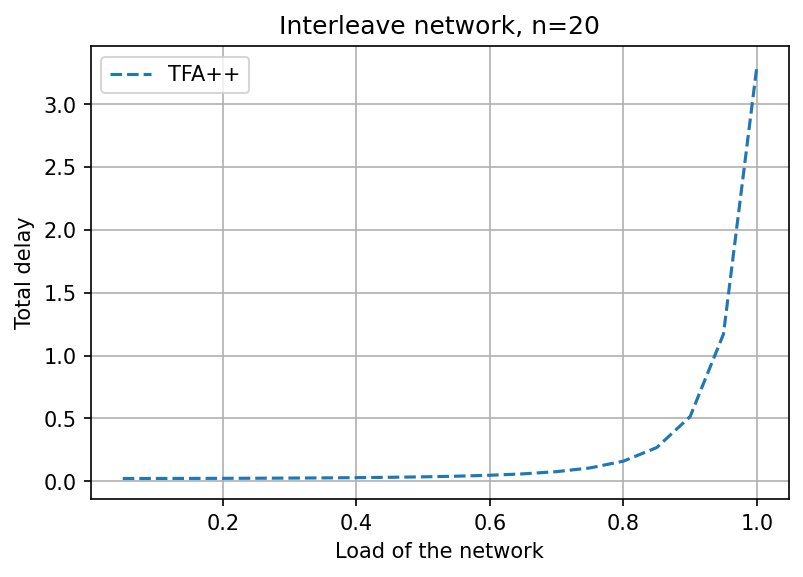

In [35]:
# Plot using matplot
plt.figure(dpi=150)
# plt.plot(utility, tfa_total_delays, '-', label="TFA")
plt.plot(utility, tfa_pp_total_delays, '--', label="TFA++")
plt.title(f"Interleave network, n={num_servers}")
plt.xlabel("Load of the network")
plt.ylabel("Total delay")
plt.legend()
plt.grid()
plt.show()

Fig. 26(a) Reproduce
------------------
Delay vs. # of servers for ring network

In [24]:
num_servers = np.arange(2, 11)
utility = 0.5

# container of answer
tfa_total_delays = [0]*len(num_servers)
tfa_pp_total_delays = [0]*len(num_servers)

In [25]:
# simulate all possible server numbers
for i, ser_num in enumerate(tqdm(num_servers)):
    # Generate network
    network = generate_ring(size=ser_num,
                            burst=burst,
                            arr_rate=dummy,
                            pkt_leng=pkt_leng,
                            latency=latency,
                            ser_rate=ser_rate,
                            capacity=capacity)
    
    analyzer.parse(network) # parse the network object
    analyzer.set_utility(utility)

    # solve TFA problem
    # tfa_delay = analyzer.solve_tfa(f"{ser_num}-server interleave TFA")
    # tfa_total_delays[i] = sum(tfa_delay)

    # solve TFA++ problem
    tfa_pp_delay = analyzer.solve_tfa_pp(f"{ser_num}-server ring TFA++")
    tfa_pp_total_delays[i] = sum(tfa_pp_delay)


100%|██████████| 9/9 [00:00<00:00, 26.80it/s]


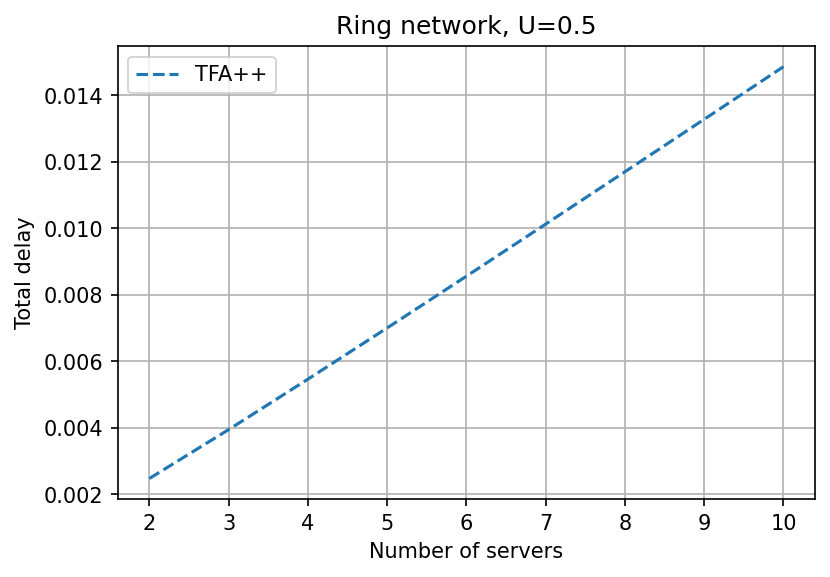

In [26]:
# Plot using matplot
plt.figure(dpi=150)
# plt.plot(num_servers, tfa_total_delays, '-', label="TFA")
plt.plot(num_servers, tfa_pp_total_delays, '--', label="TFA++")
plt.title("Ring network, U=0.5")
plt.xlabel("Number of servers")
plt.ylabel("Total delay")
plt.legend()
plt.grid()
plt.show()

Fig. 26(a) Reproduce
------------------
Delay vs. network load for ring network

In [48]:
num_servers = 7
utility = np.arange(0.1, 1.0, 0.02)

# container of answer
tfa_total_delays = [0]*len(utility)
tfa_pp_total_delays = [0]*len(utility)

In [49]:
# simulate all possible server numbers
for i, util in enumerate(tqdm(utility)):
    # Generate network
    network = generate_ring(size=num_servers,
                            burst=burst,
                            arr_rate=dummy,
                            pkt_leng=pkt_leng,
                            latency=latency,
                            ser_rate=ser_rate,
                            capacity=capacity)
    
    analyzer.parse(network) # parse the network object
    analyzer.set_utility(util)

    # solve TFA problem
    # tfa_delay = analyzer.solve_tfa(f"{util}-loaded interleave TFA")
    # tfa_total_delays[i] = sum(tfa_delay)

    # solve TFA++ problem
    tfa_pp_delay = analyzer.solve_tfa_pp(f"{util:.2f}-loaded interleave TFA++")
    tfa_pp_total_delays[i] = sum(tfa_pp_delay)


 93%|█████████▎| 42/45 [00:01<00:00, 24.14it/s]

Problem "0.84-loaded interleave TFA++" is Undefined.
Problem "0.86-loaded interleave TFA++" is Undefined.
Problem "0.88-loaded interleave TFA++" is Undefined.
Problem "0.90-loaded interleave TFA++" is Undefined.
Problem "0.92-loaded interleave TFA++" is Undefined.
Problem "0.94-loaded interleave TFA++" is Undefined.


100%|██████████| 45/45 [00:02<00:00, 21.70it/s]

Problem "0.96-loaded interleave TFA++" is Undefined.
Problem "0.98-loaded interleave TFA++" is Undefined.


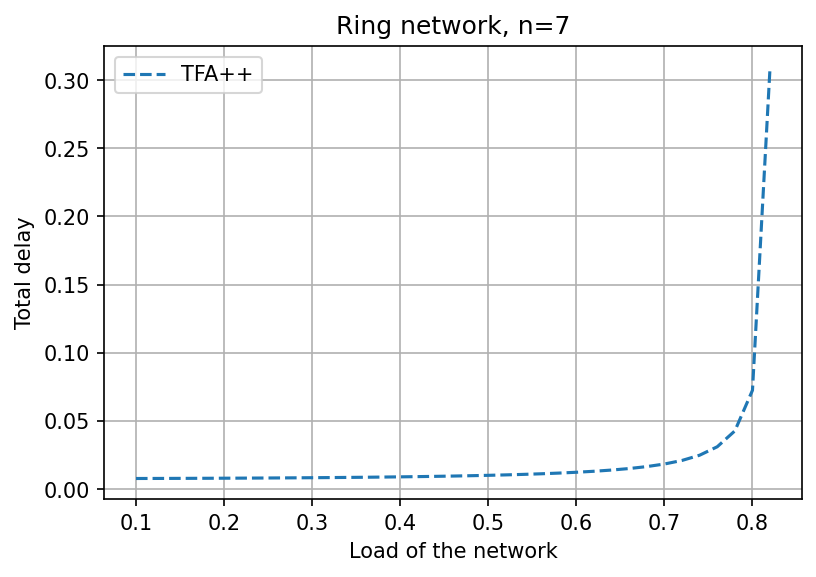

In [51]:
# Plot using matplot
plt.figure(dpi=150)
# plt.plot(utility, tfa_total_delays, '-', label="TFA")
plt.plot(utility, tfa_pp_total_delays, '--', label="TFA++")
plt.title(f"Ring network, n={num_servers}")
plt.xlabel("Load of the network")
plt.ylabel("Total delay")
plt.legend()
plt.grid()
plt.show()